In [23]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
lr = linear_model.LinearRegression()
dataset = pd.read_csv('vehiculos_procesado.csv', usecols=["consumo", "co2", "cilindros", "desplazamiento"])

In [25]:
dataset.head()

,desplazamiento,cilindros,consumo,co2
0,2.5,4.0,17,522.764706
1,4.2,6.0,13,683.615385
2,2.5,4.0,16,555.437500
3,4.2,6.0,13,683.615385
4,3.8,6.0,16,555.437500


In [26]:
# Matriz de correlación
dataset.corr()

,desplazamiento,cilindros,consumo,co2
desplazamiento,1.000000,0.904993,-0.761534,0.799911
cilindros,0.904993,1.000000,-0.717313,0.750958
consumo,-0.761534,-0.717313,1.000000,-0.958927
co2,0.799911,0.750958,-0.958927,1.000000


In [27]:
#Leer vehiculo_procesado.cvs (utilice usecols=["consumo", "co2", "cilindros","desplazamiento"])
#Hacer una predicción que cantidad de co2 se produce en los vehículos pesados a partir de un modelo regresión lineal multiple

#Revise la correlación entre estas variables.
#Divida el dataset en dos conjuntos uno de entrenamiento y otro de prueba utilizando de la librería sklearn.model_selection importe train_test_split con un 20% de datos para prueba.
#Encuentre el modelo con los datos de entrenamiento y realice la predicción con los datos de prueba.
#Realice una validación cruzada con cv=10, muestre los score, utilice como métrica a R2

#Muestre el promedio de score
#•Encuentre el R2
#•Dibuje una dispersión de los datos co2 actual vs co2 predicción


In [28]:
y_m = dataset['co2']
X_m = dataset.drop(['co2'], axis = 1)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_m, y_m, test_size = 0.2, random_state =0)

In [30]:
# Entreno el modelo
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
# Predecir
y_pred_mult = lr.predict(X_test)
print(y_pred_mult)
print(y_test)

[390.85312634 492.60630479 451.77027667 ... 410.93424855 583.81573251
 410.93424855]
22129    386.391304
21173    467.736842
4264     423.190476
19056    555.437500
21250    592.466667
            ...    
20781    423.190476
29633    555.437500
17183    388.000000
4110     571.000000
23234    382.000000
Name: co2, Length: 7108, dtype: float64


In [40]:
#  Valor de las pendientes o coeficientes "a":
print(lr.coef_)

[ 11.61678037   1.32797583 -19.83717504]


In [41]:
# Valor de la intersección o coeficiente "b":
print(lr.intercept_)

818.5626882368499


In [42]:
# Precisión del algoritmo
print(lr.score(X_train, y_train))

0.930585633466453


In [43]:
# Usando Validación Cruzada
scores = cross_val_score(lr, X_m, y_m, cv=10, scoring="r2")
scores

array([0.92348975, 0.92100359, 0.9166913 , 0.92329927, 0.93469489,
       0.92607562, 0.92043394, 0.93057615, 0.92440553, 0.90480354])

In [44]:
# Promedio de los score
scores.mean()

0.9225473584236819

In [45]:
cv_results = cross_validate(lr, X_m, y_m, cv=3, scoring="r2")
print(cv_results)

{'fit_time': array([0.02200603, 0.02100682, 0.02300715]), 'score_time': array([0.00700235, 0.00700235, 0.00800061]), 'test_score': array([0.91687806, 0.93129939, 0.91733407])}


In [46]:
sorted(cv_results.keys())
print(cv_results['test_score'])

[0.91687806 0.93129939 0.91733407]


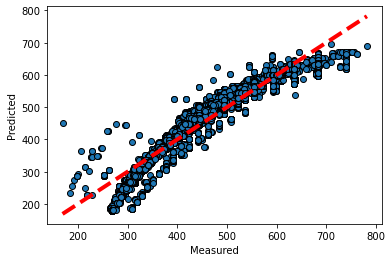

In [47]:
predicted = cross_val_predict(lr, X_m, y_m, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_m, predicted, edgecolors=(0, 0, 0))
ax.plot([y_m.min(), y_m.max()], [y_m.min(), y_m.max()], 'r--', linewidth=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()